# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

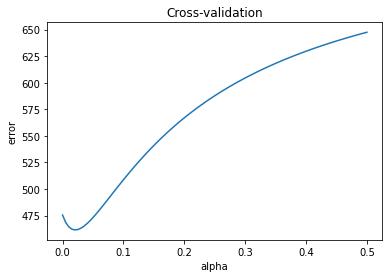

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = np.linspace(start = 0, stop = 0.5, num = 100) # change here

# add 1-3 line of code here
length = y.shape[0]
errors = []

for alpha in alphas:
    error = 0
    for i in range(length):
        x_i = x
        y_i = y
        x_i = np.delete(x_i, i, axis = 0)
        y_i = np.delete(y_i, i, axis = 0)
        
        w = np.linalg.inv(x_i.T*x_i + alpha * I)*x_i.T*y_i
        w=w.ravel()
        
        error += ((y-x*w.T)[i]**2)/(length)
    
    errors.append(error[0,0])

    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, errors)

plt.title('Cross-validation')
plt.xlabel('alpha')
plt.ylabel('error')

plt.show()

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [ ]:
def sgd():
    # your code goes here
    pass

In [ ]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 


w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
w=w.ravel()


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values # change here
y = pd.DataFrame(iris_data.target).values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b
y_pred

array([[0.92478522, 1.05141831],
       [0.88521238, 1.03558917],
       [0.90104152, 1.01976004],
       [0.89312695, 1.01184547],
       [0.93269979, 1.04350374],
       [0.95644349, 1.07516201],
       [0.91687065, 1.01184547],
       [0.91687065, 1.04350374],
       [0.87729781, 0.99601633],
       [0.89312695, 1.03558917],
       [0.94061436, 1.07516201],
       [0.91687065, 1.02767461],
       [0.88521238, 1.02767461],
       [0.88521238, 0.98810177],
       [0.96435806, 1.10682029],
       [0.99601633, 1.09890572],
       [0.95644349, 1.07516201],
       [0.92478522, 1.05141831],
       [0.94852893, 1.09890572],
       [0.94852893, 1.05141831],
       [0.91687065, 1.07516201],
       [0.94061436, 1.05141831],
       [0.93269979, 1.01184547],
       [0.90895609, 1.05141831],
       [0.91687065, 1.02767461],
       [0.88521238, 1.04350374],
       [0.91687065, 1.04350374],
       [0.92478522, 1.05933288],
       [0.91687065, 1.05933288],
       [0.90104152, 1.01976004],
       [0.